<a href="https://colab.research.google.com/github/faviasono/audio-event-tagging/blob/main/RNN_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.activations import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
from sklearn.metrics import classification_report
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [142]:
output_path = '/gdrive/MyDrive/assicurazione'

### MEL-SCALE


In [127]:
X = np.load('/gdrive/MyDrive/assicurazione/melspec_features.npy',allow_pickle=True)

In [128]:
y = np.load('/gdrive/MyDrive/assicurazione/melspec_labels.npy')

In [129]:
ss = StandardScaler()

X_t = ss.fit_transform(X.reshape(X.shape[0],-1))

X_t = X_t.reshape(X.shape[0],X.shape[1],X.shape[2])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=.20, stratify=y, random_state=42) #standardized

In [12]:
def BLSTM(select= 'mfcc'):
    
    choices = dict(mfcc=13, mel_spec = 128)
    
    assert select in choices.keys()
    
    input_size = choices[select]
    
    adam = Adam(learning_rate=0.01)
    nadam = Nadam(learning_rate=0.01)
    rms = RMSprop(learning_rate=0.01)
    
    inputs = Input(shape = (None, input_size))
    

    encoder = Bidirectional(LSTM(32,return_sequences=True))(inputs)
    encoder = Dropout(0.5)(encoder)

    encoder = Bidirectional(LSTM(32,return_sequences=True))(encoder)
    encoder = Dropout(0.5)(encoder)

    encoder = Bidirectional(LSTM(32))(encoder)
    encoder = Dropout(0.5)(encoder)

    
    
    decoder = Dense(64,activation='relu')(encoder)
    decoder = Dropout(0.50)(decoder)
    decoder = Dense(64,activation='relu')(decoder)
    decoder = Dropout(0.50)(decoder)
    
    output = Dense(3,activation='softmax')(decoder)

    model = Model(inputs = inputs,outputs = output)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer = rms)
    
    return model
    



In [14]:
blstm_std = BLSTM('mel_spec')

blstm_std_history = blstm_std.fit(X_train,y_train,epochs=100,batch_size = 64, validation_data=(X_test,y_test))

Epoch 1/100
43/43 [==============================] - 6s 147ms/step - loss: 1.1192 - accuracy: 0.3572 - val_loss: 1.0693 - val_accuracy: 0.4181
Epoch 2/100
43/43 [==============================] - 4s 104ms/step - loss: 1.0759 - accuracy: 0.4337 - val_loss: 1.0453 - val_accuracy: 0.5132
Epoch 3/100
43/43 [==============================] - 4s 105ms/step - loss: 1.0574 - accuracy: 0.4488 - val_loss: 1.0177 - val_accuracy: 0.4985
Epoch 4/100
43/43 [==============================] - 4s 103ms/step - loss: 1.0353 - accuracy: 0.4967 - val_loss: 1.0134 - val_accuracy: 0.5015
Epoch 5/100
43/43 [==============================] - 4s 103ms/step - loss: 1.0401 - accuracy: 0.4678 - val_loss: 1.0070 - val_accuracy: 0.4971
Epoch 6/100
43/43 [==============================] - 4s 103ms/step - loss: 1.0281 - accuracy: 0.4755 - val_loss: 1.0375 - val_accuracy: 0.4810
Epoch 7/100
43/43 [==============================] - 4s 104ms/step - loss: 1.0330 - accuracy: 0.4766 - val_loss: 0.9953 - val_accuracy: 0.5132

In [62]:
blstm_std.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 128)]       0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          41216     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [140]:
c = classification_report(np.argmax(y_test,axis=1),np.argmax(blstm_std.predict(X_test),axis=1),target_names=['Animal','Humans','Natural'])
print(c)

              precision    recall  f1-score   support

      Animal       0.64      0.75      0.69       240
      Humans       0.43      0.54      0.48       204
     Natural       0.68      0.42      0.52       240

    accuracy                           0.57       684
   macro avg       0.59      0.57      0.56       684
weighted avg       0.59      0.57      0.57       684



[0.64, 0.75, 0.69]
[0.43, 0.54, 0.48]
[0.68, 0.42, 0.52]
plotMat: [[0.64, 0.75, 0.69], [0.43, 0.54, 0.48], [0.68, 0.42, 0.52]]
support: [240, 204, 240]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


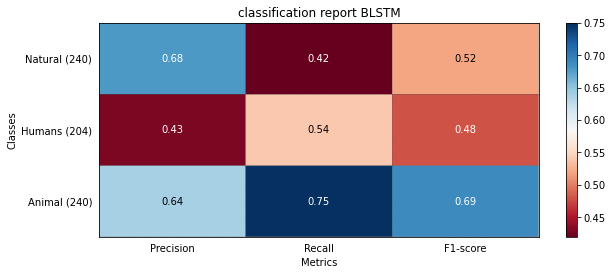

In [61]:
blstm_std.save(output_path+'blstm_std_3.h5')
plot_classification_report(c,title='classification report BLSTM')
plt.savefig(output_path+'/classificationBLSTM.png')

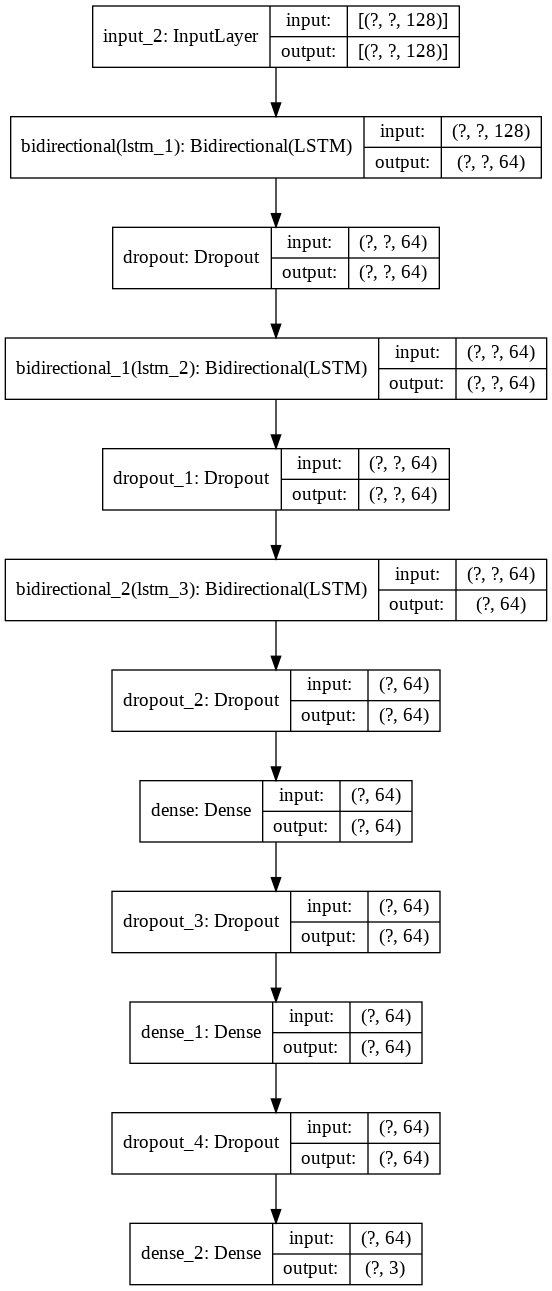

In [57]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file=output_path+'model.png')
from IPython.display import Image
Image(retina=True, filename=output_path+'model.png')

In [51]:
model = tf.keras.models.load_model(output_path + 'blstm_std_3.h5')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 128)]       0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          41216     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [ ]:
def BGRU(select= 'mfcc'):
    
    choices = dict(mfcc=13, mel_spec = 128)
    
    assert select in choices.keys()
    
    input_size = choices[select]
    
    adam = Adam(learning_rate=0.01)
    nadam = Nadam(learning_rate=0.01)
    rms = RMSprop(learning_rate=0.01)
    
    inputs = Input(shape = (None, input_size))
    
    encoder = Bidirectional(GRU(32,return_sequences=True))(inputs)
    encoder = Dropout(0.5)(encoder)

    encoder = Bidirectional(GRU(32,return_sequences=True))(encoder)
    encoder = Dropout(0.5)(encoder)

    encoder = Bidirectional(GRU(32))(encoder)
    encoder = Dropout(0.5)(encoder)

    
    decoder = Dense(64,activation='relu')(encoder)
    decoder = Dropout(0.50)(decoder)
    decoder = Dense(64,activation='relu')(decoder)
    decoder = Dropout(0.50)(decoder)
    
    output = Dense(3,activation='softmax')(decoder)

    model = Model(inputs = inputs,outputs = output)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer = nadam)
    
    return model
    


#on standardized data

bgru = BGRU('mel_spec')

bgru_history = bgru.fit(X_train,y_train,epochs=100,batch_size = 64, validation_data=(X_test,y_test))



[0.22, 0.19, 0.21]
[0.24, 0.48, 0.32]
[0.49, 0.16, 0.24]
plotMat: [[0.22, 0.19, 0.21], [0.24, 0.48, 0.32], [0.49, 0.16, 0.24]]
support: [240, 204, 240]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


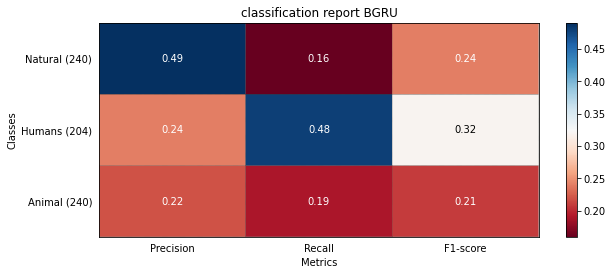

In [137]:
c = classification_report(np.argmax(y_test,axis=1),np.argmax(bgru.predict(X_test),axis=1),target_names=['Animal','Humans','Natural'])

plot_classification_report(c,title='classification report BGRU')
plt.savefig(output_path+'/classificationBGRU.png')

bgru.save(output_path+'/bgru_model.h5')

### MFCCs

In [96]:
path = os.getcwd() + '/features_/'

X= [np.load(path+nam,allow_pickle =True).tolist()['mfcc'] for nam in tqdm(os.listdir(path))]


100%|██████████| 3410/3410 [13:55<00:00,  4.08it/s]


In [100]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = [pad_sequences(x,dtype='float',maxlen=430,padding='post',truncating='post').T for x in X]
X = np.asarray(X)
np.save(output_path+'/mfcc_features',X)


In [105]:

ss = StandardScaler()

X_t = ss.fit_transform(X.reshape(X.shape[0],-1))

X_t = X_t.reshape(X.shape[0],X.shape[1],X.shape[2])

X_train, X_test, y_train, y_test = train_test_split(X_t, y[:3410], test_size=.20, stratify=y[:3410], random_state=42)


Epoch 1/100
43/43 [==============================] - 6s 150ms/step - loss: 1.1158 - accuracy: 0.3798 - val_loss: 1.0896 - val_accuracy: 0.4135
Epoch 2/100
43/43 [==============================] - 4s 99ms/step - loss: 1.0877 - accuracy: 0.4095 - val_loss: 1.0923 - val_accuracy: 0.3871
Epoch 3/100
43/43 [==============================] - 4s 98ms/step - loss: 1.0750 - accuracy: 0.4274 - val_loss: 1.0483 - val_accuracy: 0.4633
Epoch 4/100
43/43 [==============================] - 4s 98ms/step - loss: 1.0732 - accuracy: 0.4362 - val_loss: 1.0499 - val_accuracy: 0.4956
Epoch 5/100
43/43 [==============================] - 4s 98ms/step - loss: 1.0661 - accuracy: 0.4487 - val_loss: 1.0532 - val_accuracy: 0.4707
Epoch 6/100
43/43 [==============================] - 4s 98ms/step - loss: 1.0523 - accuracy: 0.4454 - val_loss: 1.0548 - val_accuracy: 0.4238
Epoch 7/100
43/43 [==============================] - 4s 98ms/step - loss: 1.0677 - accuracy: 0.4435 - val_loss: 1.0514 - val_accuracy: 0.4633
Epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


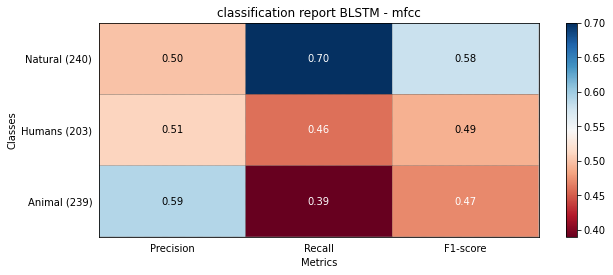

In [106]:


blstm_mfcc = BLSTM()
blstm_mfcc_history = blstm_mfcc.fit(X_train,y_train,epochs=100,batch_size = 64, validation_data=(X_test,y_test))

c = classification_report(np.argmax(y_test,axis=1),np.argmax(blstm_mfcc.predict(X_test),axis=1),target_names=['Animal','Humans','Natural'])

plot_classification_report(c,title='classification report BLSTM - mfcc')
plt.savefig(output_path+'/classificationBLSTM_mfcc.png')

bgru.save(output_path+'/blstm_mfcc.h5')

Epoch 1/100
43/43 [==============================] - 6s 147ms/step - loss: 1.1123 - accuracy: 0.3904 - val_loss: 1.0673 - val_accuracy: 0.4340
Epoch 2/100
43/43 [==============================] - 4s 100ms/step - loss: 1.0805 - accuracy: 0.4263 - val_loss: 1.0644 - val_accuracy: 0.4296
Epoch 3/100
43/43 [==============================] - 4s 100ms/step - loss: 1.0698 - accuracy: 0.4282 - val_loss: 1.0403 - val_accuracy: 0.4853
Epoch 4/100
43/43 [==============================] - 4s 101ms/step - loss: 1.0640 - accuracy: 0.4380 - val_loss: 1.0528 - val_accuracy: 0.4751
Epoch 5/100
43/43 [==============================] - 4s 100ms/step - loss: 1.0556 - accuracy: 0.4626 - val_loss: 1.0389 - val_accuracy: 0.4912
Epoch 6/100
43/43 [==============================] - 4s 99ms/step - loss: 1.0569 - accuracy: 0.4696 - val_loss: 1.0528 - val_accuracy: 0.4589
Epoch 7/100
43/43 [==============================] - 4s 100ms/step - loss: 1.0592 - accuracy: 0.4487 - val_loss: 1.0389 - val_accuracy: 0.4531


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


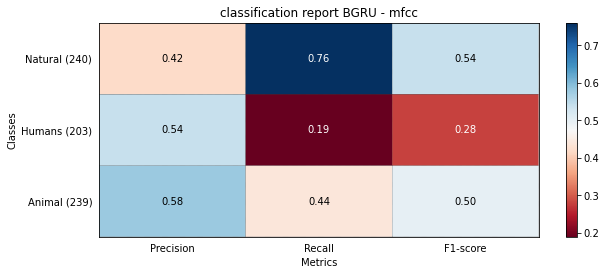

In [107]:
bgru_mfcc = BGRU()
bgru_mfcc_history = bgru_mfcc.fit(X_train,y_train,epochs=100,batch_size = 64, validation_data=(X_test,y_test))

c = classification_report(np.argmax(y_test,axis=1),np.argmax(bgru_mfcc.predict(X_test),axis=1),target_names=['Animal','Humans','Natural'])

plot_classification_report(c,title='classification report BGRU - mfcc')
plt.savefig(output_path+'/classificationbgru_mfcc.png')

bgru.save(output_path+'/bgru_mfcc.h5')

Normalized confusion matrix
[[0.44 0.08 0.48]
 [0.16 0.19 0.66]
 [0.19 0.05 0.76]]


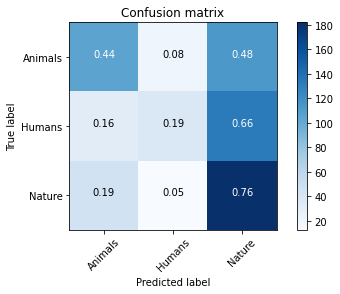

In [124]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(bgru_mfcc.predict(X_test),axis=1))


plot_confusion_matrix(cm,classes=['Animals','Humans','Nature'],normalize=True)
plt.savefig(output_path+'/cm_bgru_mfcc.png')

Normalized confusion matrix
[[0.39 0.23 0.38]
 [0.13 0.46 0.4 ]
 [0.15 0.14 0.7 ]]


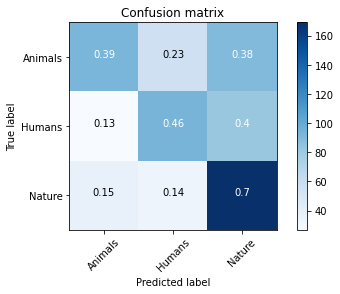

In [126]:
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(blstm_mfcc.predict(X_test),axis=1))


plot_confusion_matrix(cm,classes=['Animals','Humans','Nature'],normalize=True)
plt.savefig(output_path+'/cm_blstm_mfcc.png')

Normalized confusion matrix
[[0.75 0.23 0.02]
 [0.25 0.54 0.2 ]
 [0.2  0.38 0.42]]


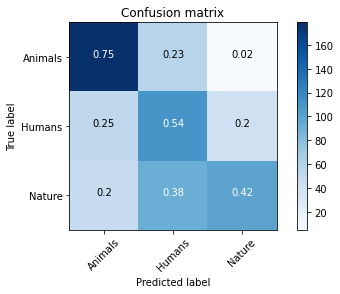

In [131]:
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(blstm_std.predict(X_test),axis=1))

plot_confusion_matrix(cm,classes=['Animals','Humans','Nature'],normalize=True)
plt.savefig(output_path+'/cm_blstm_std.png')

Normalized confusion matrix
[[0.19 0.74 0.07]
 [0.41 0.48 0.11]
 [0.32 0.52 0.16]]


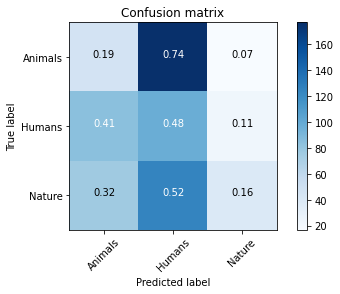

In [141]:
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(bgru.predict(X_test),axis=1))

plot_confusion_matrix(cm,classes=['Animals','Humans','Nature'],normalize=True)
plt.savefig(output_path+'/cm_bgru.png')

### Utils functions

In [44]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')
    lines = lines[:-2]
    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

In [120]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')